# STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS

### Objective : Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

* Datasets : Download historical stock prices from https://finance.yahoo.com/quote/QMCI/history?p=QMCI

* Download textual (news) data from https://bit.ly/36fFPI6

#### ---Saishankar Yenagi , Data Science and Business Analytics Intern

In [2]:
##Import the necessary libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error



# Load the Historical data..

In [3]:
historic_data = pd.read_csv('Historical_data.csv')
historic_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-20,0.10,0.1,0.10,0.1,0.1,0
1,2020-04-21,0.10,0.1,0.10,0.1,0.1,0
2,2020-04-22,0.09,0.1,0.09,0.1,0.1,74000
3,2020-04-23,0.10,0.1,0.10,0.1,0.1,0
4,2020-04-24,0.10,0.1,0.10,0.1,0.1,0


In [4]:
historic_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2021-04-12,0.21,0.21,0.20,0.20,0.20,112800
247,2021-04-13,0.20,0.20,0.19,0.19,0.19,130200
248,2021-04-14,0.18,0.20,0.18,0.20,0.20,101100
249,2021-04-15,0.20,0.21,0.19,0.20,0.20,31800
250,2021-04-16,0.21,0.21,0.20,0.20,0.20,15300


In [5]:
historic_data.shape

(251, 7)

In [6]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
historic_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,0.134940,0.142032,0.128247,0.135179,0.135179,9.302112e+04
std,0.054863,0.059748,0.047934,0.052332,0.052332,3.143852e+05
min,0.080000,0.080000,0.050000,0.080000,0.080000,0.000000e+00
25%,0.090000,0.095000,0.090000,0.090000,0.090000,5.000000e+03
50%,0.110000,0.110000,0.110000,0.110000,0.110000,3.750000e+04
75%,0.190000,0.205000,0.180000,0.190000,0.190000,9.665000e+04
max,0.390000,0.400000,0.270000,0.280000,0.280000,4.710100e+06


In [8]:
historic_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
##Convert the int data type to datetime of the column "Date"..

historic_data['Date'] = pd.to_datetime(historic_data['Date'])
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [10]:
historic_data = historic_data[["Date","Open","High","Low","Close","Volume"]] #Analysing the information of the Historical dataset
historic_data.head(-5)

,Date,Open,High,Low,Close,Volume
0,2020-04-20,0.10,0.10,0.10,0.10,0
1,2020-04-21,0.10,0.10,0.10,0.10,0
2,2020-04-22,0.09,0.10,0.09,0.10,74000
3,2020-04-23,0.10,0.10,0.10,0.10,0
4,2020-04-24,0.10,0.10,0.10,0.10,0
...,...,...,...,...,...,...
241,2021-04-05,0.20,0.22,0.17,0.22,147800
242,2021-04-06,0.22,0.23,0.21,0.21,40600
243,2021-04-07,0.21,0.23,0.20,0.21,39400
244,2021-04-08,0.19,0.22,0.19,0.21,51100


# Load the News Data

In [11]:
news_data = pd.read_csv('C://Users//Administrator//Downloads//india-news-headlines.csv')

In [12]:
news_data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [13]:
news_data.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [14]:
news_data.shape

(3424067, 3)

In [15]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [16]:
##Convert the int data type to Datetype of the column "publish_date"..

news_data["publish_date"] = pd.to_datetime(news_data["publish_date"],format='%Y%m%d')
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [17]:
news_data['headline_text'].replace("[^a-zA-Z']"," ", regex = True, inplace = True)

In [18]:
news_data['headline_text']

0          Status quo will not be disturbed at Ayodhya  s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India 
3                         For bigwigs  it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3424062    Covid     Despite dip in cases  Rajasthan amon...
3424063    Covid     Despite dip in cases  Rajasthan amon...
3424064    Covid     Despite dip in cases  Rajasthan amon...
3424065    Govt extends deadline for use of FASTag till F...
3424066    Celebs plan to party safely and responsibly on...
Name: headline_text, Length: 3424067, dtype: object

In [19]:
news_data.isnull().sum()  

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [20]:
news_data.drop('headline_category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
news_data.head(-5)

Showing part of the whole dataset:


,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424057,2020-12-31,NRIs reach Singhu offer help to farmers
3424058,2020-12-31,Navjot Singh Sidhu tweets apology says 'wore ...
3424059,2020-12-31,Azim Premji organisation's name misused to che...
3424060,2020-12-31,Get govt nod to probe officials MP to agencies


## Analyse the Historical Data.

In [21]:
historic_data

,Date,Open,High,Low,Close,Volume
0,2020-04-20,0.10,0.10,0.10,0.10,0
1,2020-04-21,0.10,0.10,0.10,0.10,0
2,2020-04-22,0.09,0.10,0.09,0.10,74000
3,2020-04-23,0.10,0.10,0.10,0.10,0
4,2020-04-24,0.10,0.10,0.10,0.10,0
...,...,...,...,...,...,...
246,2021-04-12,0.21,0.21,0.20,0.20,112800
247,2021-04-13,0.20,0.20,0.19,0.19,130200
248,2021-04-14,0.18,0.20,0.18,0.20,101100
249,2021-04-15,0.20,0.21,0.19,0.20,31800


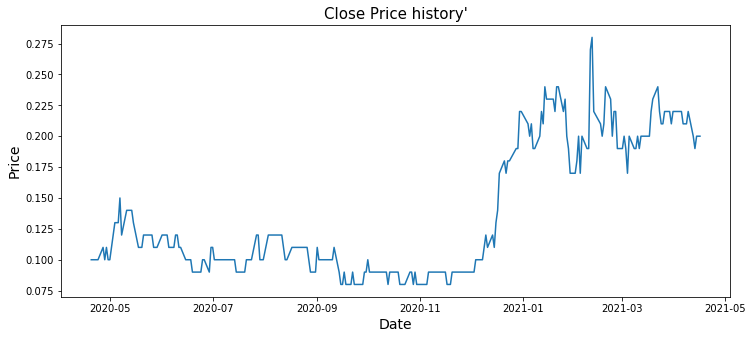

In [22]:
historic_data.index = historic_data['Date'] 
#plot
plt.figure(figsize=(12,5))
plt.plot(historic_data['Close'], label='Close Price history')
plt.title("Close Price history'", fontsize = 15)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()



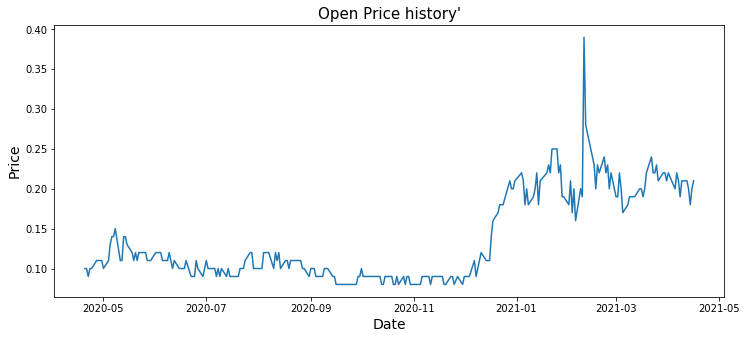

In [23]:
plt.figure(figsize=(12,5))

plt.plot(historic_data['Open'])
plt.title("Open Price history'", fontsize = 15)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()



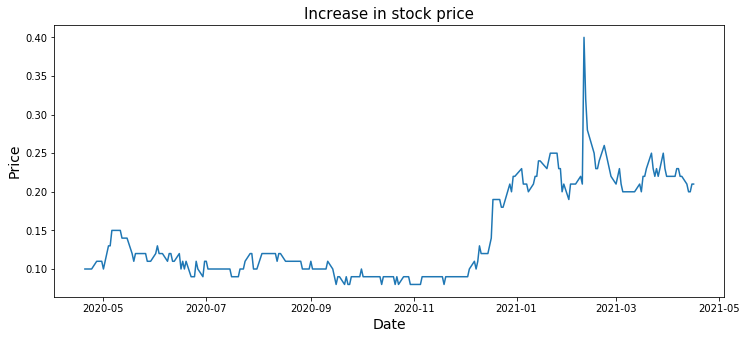

In [24]:
plt.figure(figsize=(12,5))
plt.plot(historic_data['High'])
plt.title("Increase in stock price", fontsize = 15)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


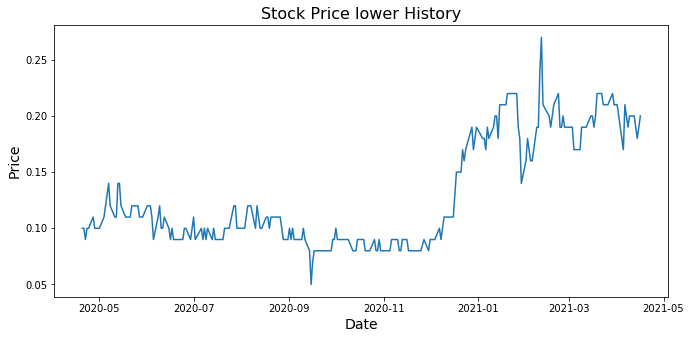

In [25]:
plt.figure(figsize=(11,5))
plt.plot(historic_data['Low'])
plt.title("Stock Price lower History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

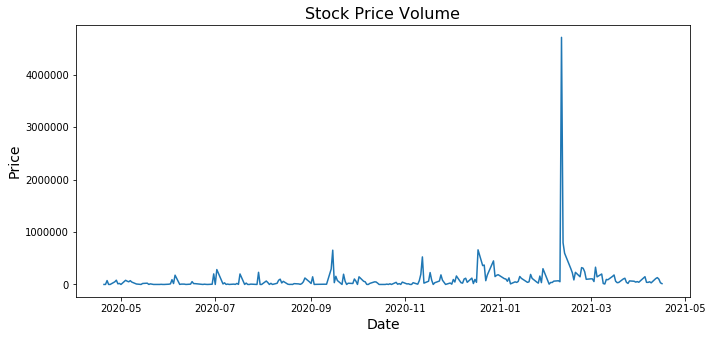

In [26]:
plt.figure(figsize=(11,5))
plt.plot(historic_data['Volume'])
plt.title("Stock Price Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

# Textual Data

In [27]:
news_data.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


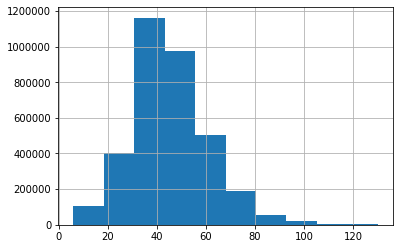

<Figure size 720x288 with 0 Axes>

In [36]:
news_data['headline_text'].str.len().hist()
plt.figure(figsize=(10,4))
plt.show()


## Subjectivity and Polarity Scores..

In [30]:
#import the libraries for sentiment analysis..
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [35]:
!pip install textblob 

In [37]:
from textblob import TextBlob

In [41]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [42]:
news_data['Subjectivity'] = news_data['headline_text'].apply(getSubjectivity) ##Adding subjectivity score

In [44]:
news_data['Polarity'] = news_data['headline_text'].apply(getPolarity) ##Adding polarity scores

In [45]:
news_data

,publish_date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000
2,2001-01-02,America's unwanted heading for India,0.000000,0.000000
3,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000
...,...,...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000


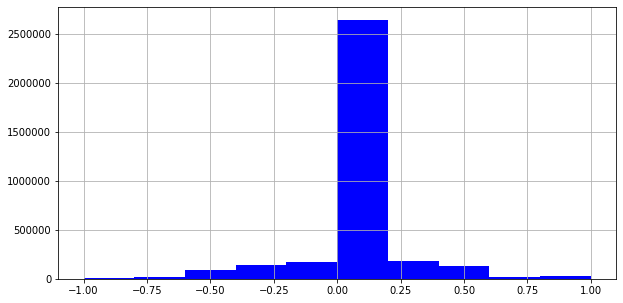

In [46]:
plt.figure(figsize = (10,5))
news_data['Polarity'].hist(color = 'blue')

Text(0.5, 0, 'Subjectivity')

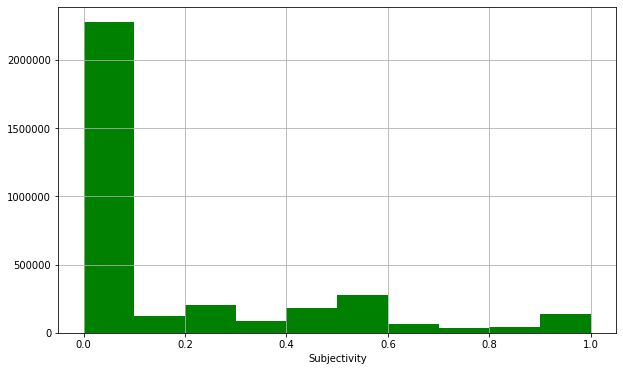

In [49]:
plt.figure(figsize = (10,6))
news_data['Subjectivity'].hist(color = 'green')
plt.xlabel("Subjectivity")

## Sentiment Analysis on headlines of the Newsdata

In [53]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


In [54]:
sia = SentimentIntensityAnalyzer()  ##Adding sentiment score to news


In [57]:
news_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_data['headline_text']] ##Adding sentiment score to news

In [62]:
news_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_data['headline_text']] ##Adding sentiment score to news

In [63]:
news_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_data['headline_text']] ##Adding sentiment score to news

In [65]:
#Dataframe having Subjectivty,Negative,Neutral and Positive (Polarity) Scores of the new data.
news_data

,publish_date,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India,0.000000,0.000000,0.322,0.678,0.000
3,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.842,0.158


In [66]:
news_data.rename(columns={'publish_date': 'Date'}, inplace=True)

In [67]:
news_data

,Date,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India,0.000000,0.000000,0.322,0.678,0.000
3,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.842,0.158


### In order to avoid the ambiguous we need to rename the axis with none of the index level and column level of the dataset..

In [70]:
news_data = news_data.rename_axis(None)

In [73]:
historic_data = historic_data.rename_axis(None)

In [74]:
df_final = pd.merge(historic_data, news_data, how='inner', on='Date')
df_final

,Date,Open,High,Low,Close,Volume,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2020-04-20,0.10,0.10,0.10,0.10,0,In first quarter of fatal accidents on e...,0.311111,0.047222,0.420,0.580,0.000
1,2020-04-20,0.10,0.10,0.10,0.10,0,Dhyan Sreenivasan I was trying to mock alcoho...,0.350000,0.300000,0.175,0.562,0.263
2,2020-04-20,0.10,0.10,0.10,0.10,0,LockdownGoals Tips and tricks to jazz up you...,0.000000,0.000000,0.143,0.857,0.000
3,2020-04-20,0.10,0.10,0.10,0.10,0,From Anushka Sharma's over sized shirt to Katr...,0.722222,0.333333,0.000,0.760,0.240
4,2020-04-20,0.10,0.10,0.10,0.10,0,Brit Sikhs fear they could be disproportionate...,0.000000,0.000000,0.314,0.686,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
89308,2020-12-31,0.21,0.22,0.19,0.22,186100,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
89309,2020-12-31,0.21,0.22,0.19,0.22,186100,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
89310,2020-12-31,0.21,0.22,0.19,0.22,186100,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
89311,2020-12-31,0.21,0.22,0.19,0.22,186100,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.842,0.158


In [76]:
df_final = df_final.drop(['Date', 'Open', 'High', 'Low', 'Volume', 'headline_text'], axis=1)

In [78]:
df_final[:5]

,Close,Subjectivity,Polarity,Negative,Neutral,Positive
0,0.1,0.311111,0.047222,0.420,0.580,0.000
1,0.1,0.350000,0.300000,0.175,0.562,0.263
2,0.1,0.000000,0.000000,0.143,0.857,0.000
3,0.1,0.722222,0.333333,0.000,0.760,0.240
4,0.1,0.000000,0.000000,0.314,0.686,0.000


In [79]:
df_final.dtypes

Close           float64
Subjectivity    float64
Polarity        float64
Negative        float64
Neutral         float64
Positive        float64
dtype: object

## Preprocessing and Normalization

In [80]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [83]:
#Normalization
df_final1.columns = df_final.columns
df_final1 = pd.DataFrame(mm.fit_transform(df_final)) #Normalization
df_final1.columns = df_final.columns
df_final1.index = df_final.index


In [84]:
df_final1[:5]

,Close,Subjectivity,Polarity,Negative,Neutral,Positive
0,0.142857,0.311111,0.523611,0.420,0.580,0.000
1,0.142857,0.350000,0.650000,0.175,0.562,0.263
2,0.142857,0.000000,0.500000,0.143,0.857,0.000
3,0.142857,0.722222,0.666667,0.000,0.760,0.240
4,0.142857,0.000000,0.500000,0.314,0.686,0.000


In [112]:
#Split the data
X = df_final1.drop(['Close'], axis=1)
y = df_final1['Close']

In [86]:
X.head()

,Subjectivity,Polarity,Negative,Neutral,Positive
0,0.311111,0.523611,0.420,0.580,0.000
1,0.350000,0.650000,0.175,0.562,0.263
2,0.000000,0.500000,0.143,0.857,0.000
3,0.722222,0.666667,0.000,0.760,0.240
4,0.000000,0.500000,0.314,0.686,0.000


In [87]:
y.head()

0    0.142857
1    0.142857
2    0.142857
3    0.142857
4    0.142857
Name: Close, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [90]:
X_train

,Subjectivity,Polarity,Negative,Neutral,Positive
49858,0.550000,0.700000,0.000,0.467,0.533
6612,0.571429,0.678571,0.000,0.649,0.351
6236,0.000000,0.500000,0.000,1.000,0.000
34220,0.000000,0.500000,0.000,1.000,0.000
85990,0.250000,0.550000,0.000,0.762,0.238
...,...,...,...,...,...
21243,0.000000,0.500000,0.605,0.395,0.000
45891,0.000000,0.500000,0.000,1.000,0.000
42613,0.000000,0.500000,0.660,0.340,0.000
43567,0.520833,0.477083,0.275,0.534,0.191


In [91]:
X_test

,Subjectivity,Polarity,Negative,Neutral,Positive
88651,0.000000,0.500000,0.000,1.000,0.000
86329,0.300000,0.675000,0.152,0.562,0.287
77948,0.288889,0.422222,0.000,1.000,0.000
81900,0.500000,0.750000,0.000,1.000,0.000
58611,0.000000,0.500000,0.000,1.000,0.000
...,...,...,...,...,...
25753,0.000000,0.500000,0.000,1.000,0.000
3930,0.000000,0.450000,0.375,0.625,0.000
47957,0.600000,0.433333,0.000,0.649,0.351
55846,0.000000,0.500000,0.130,0.870,0.000


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [93]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
sm = svm.SVR()

## Apply RandomForestRegressor on the model

In [108]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
rf1 = mean_squared_error(predictions, y_test)

In [109]:
print("mean squared error for RandomForest: ",rf1)

mean squared error for RandomForest:  0.03236043929519014


## Apply DecisionTreeRegressor on the model.

In [110]:
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
dt1 = mean_squared_error(predictions, y_test)

In [111]:
print("mean squared error for Decision tree: ",dt1)

mean squared error for Decision tree:  0.038650283322496995


## Conclusion:

### We observe that RandomForestRegressor has the least mean squared error. So lower the the value , it is better for the model. So RandomForestRegressor algorithm suits the model.

### By Analyzing and Visualization we are able able to create the model which predicts the values of numerical analysis of  Historical stock price and Sentiment Analysis for News Headlines 

### We have used two ML Algorithms - Decision tree Regressor and Random Forest Regressor